In [11]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

In [12]:
df = pd.read_csv("commons-lang-stats-java.csv")
df.head()

,project,datapoint,n_commits,n_files,n_files_updated_i,shared_files
0,commons-lang,10496897d06a68cd9555ae5368bd1889b7dfa862_e8054...,2,3,2,0
1,commons-lang,10496897d06a68cd9555ae5368bd1889b7dfa862_b2f17...,3,24,22,1
2,commons-lang,10496897d06a68cd9555ae5368bd1889b7dfa862_b2bba...,4,29,7,3
3,commons-lang,b2f1757bf9ec1632a940b9a2e65a1a022ba54af8_b2bba...,2,19,7,2
4,commons-lang,7f89bd4850b7a5b0dd2a10d2f2daa62805de5bca_7e512...,2,2,2,0


In [15]:
df.describe()

,n_commits,n_files,n_files_updated_i,shared_files
count,2028.000000,2028.000000,2028.000000,2028.000000
mean,2.808185,13.703649,7.456114,1.385602
std,0.802802,26.298249,19.948789,8.144673
min,2.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,0.000000
50%,3.000000,6.000000,3.000000,0.000000
75%,3.000000,14.000000,6.000000,1.000000
max,4.000000,227.000000,222.000000,222.000000


# Tangled Files in Synthetic Commits

In [21]:
df.drop(['project', 'datapoint', 'n_commits', 'n_files', 'n_files_updated_i'], axis=1)['shared_files'].value_counts(normalize=True)

KeyError: '2%'

In [18]:
distribution = df.drop(['project', 'datapoint', 'n_files', 'n_files_updated_i'], axis=1).groupby('n_commits', sort=True).value_counts(normalize=True)
distribution

n_commits  shared_files
2          0               0.707345
           1               0.210169
           2               0.058757
           3               0.011299
           4               0.004520
           5               0.002260
           28              0.001130
           10              0.001130
           8               0.001130
           7               0.001130
           6               0.001130
3          0               0.446677
           1               0.268934
           2               0.170015
           3               0.052550
           4               0.020093
           5               0.009274
           8               0.006182
           6               0.004637
           7               0.003091
           12              0.003091
           222             0.001546
           166             0.001546
           33              0.001546
           23              0.001546
           19              0.001546
           14              0.001546
    

In [8]:
q = df["shared_files"].quantile(0.99)
df_no_out = df[df["shared_files"] < q]
df_23 = df_no_out[df_no_out["n_commits"] <= 3]

<Axes: xlabel='shared_files', ylabel='Count'>

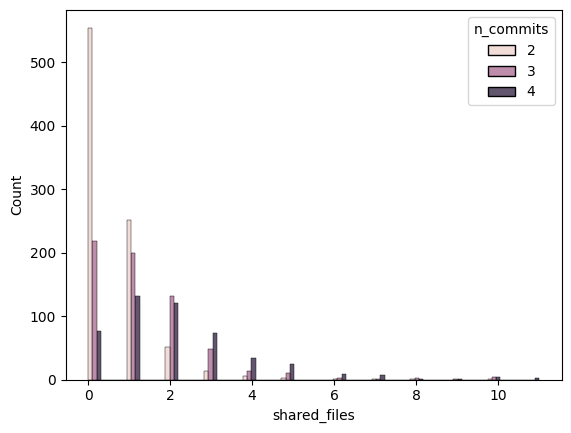

In [9]:
sns.histplot(df_no_out, x='shared_files', hue='n_commits', multiple="dodge")

<Axes: xlabel='shared_files', ylabel='Count'>

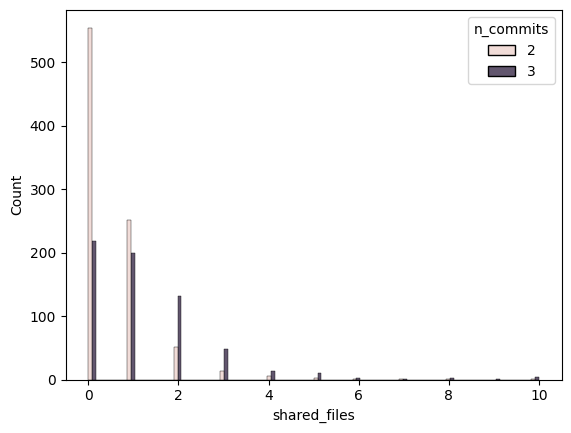

In [10]:
sns.histplot(df_23, x='shared_files', hue='n_commits', multiple="dodge")

In [19]:
df.drop(['project', 'datapoint', 'n_files', 'n_files_updated_i', 'shared_files'], axis=1).value_counts\
    (normalize=True)

n_commits
2            0.436391
3            0.319034
4            0.244576
dtype: float64